In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_style('whitegrid')

# dataset from https://www.kaggle.com/competitions/amex-default-prediction/data
california = Path('data/amex/')
assert california.exists()
sorted(california.iterdir())

[PosixPath('data/amex/READY'),
 PosixPath('data/amex/X_num_test.npy'),
 PosixPath('data/amex/X_num_train.npy'),
 PosixPath('data/amex/X_num_val.npy'),
 PosixPath('data/amex/Y_test.npy'),
 PosixPath('data/amex/Y_train.npy'),
 PosixPath('data/amex/Y_val.npy'),
 PosixPath('data/amex/info.json')]

In [ ]:
for name in ['X_num_train.npy', 'X_num_val.npy', 'X_num_test.npy', 'Y_train.npy', 'Y_val.npy', 'Y_test.npy']:
    tmp = np.load(california / name)
    assert np.isnan(tmp).sum() == 0
    print(name, tmp.shape, tmp.dtype)

X_num_train.npy (32000, 78) float32
X_num_val.npy (8000, 78) float32
X_num_test.npy (10000, 78) float32
Y_train.npy (32000,) int64
Y_val.npy (8000,) int64
Y_test.npy (10000,) int64


In [ ]:
X_path = Path('../train_data.csv')
y_path = Path('../train_labels.csv')
assert X_path.exists() and y_path.exists()

In [ ]:
y = pd.read_csv(y_path)

In [ ]:
import csv
from tqdm.notebook import tqdm


clean_data_path = Path('../train_clean_data.csv')

if not clean_data_path.exists():
    X_clean = []
    with open(X_path, 'r') as csv_file:
        iterator = iter(csv.reader(csv_file))
        header = next(iterator)
        print(header)
        i = 0
        for row in tqdm(iterator, total=len(y) * 13):
            id = row[0]
            if X_clean and row[0] == X_clean[-1][0]:
                X_clean[-1] = row
            else:
                X_clean.append(row)
    for i, row in tqdm(enumerate(X_clean), total=len(X_clean)):
        X_clean[i] = [row[0], row[1]] + [(float(x) if x != '' else None) for x in row[2:53] + row[55:]]
    X_clean = pd.DataFrame(X_clean, columns=header[:53] + header[55:])
    assert (X_clean['customer_ID'] == y['customer_ID']).all()
    X_clean.to_csv(clean_data_path, index=False)
else:
    X_clean = pd.read_csv(clean_data_path)

In [ ]:
DATASET_SIZE = 50000
current_size = len(X_clean)
ind = np.random.choice(range(current_size), replace=False, size=DATASET_SIZE)

In [ ]:
y_clean = y.loc[ind, 'target']

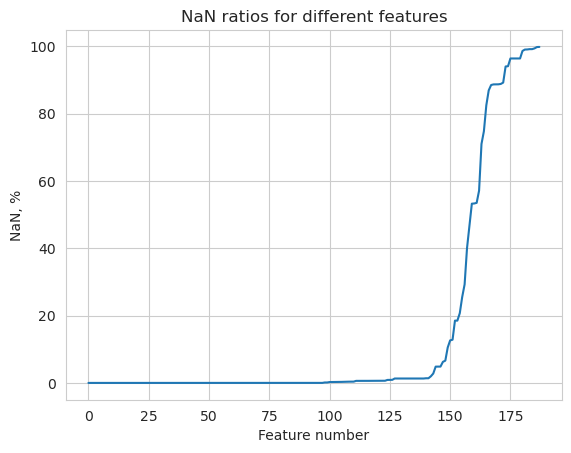

In [ ]:
nan_ratios = X_clean.isna().sum() / len(X_clean) * 100
plt.plot(nan_ratios.sort_values().values)
plt.xlabel('Feature number')
plt.ylabel('NaN, %')
plt.title('NaN ratios for different features')
plt.show()

In [ ]:
take_columns = X_clean.columns[(nan_ratios == 0)]
print(list(take_columns))
len(take_columns), len(take_columns) / len(X_clean.columns) * 100

['customer_ID', 'S_2', 'D_39', 'B_1', 'R_1', 'B_4', 'B_5', 'R_2', 'D_47', 'B_7', 'D_51', 'B_9', 'R_3', 'B_10', 'S_5', 'B_11', 'S_6', 'R_4', 'B_12', 'S_8', 'R_5', 'D_58', 'B_14', 'D_60', 'S_11', 'D_65', 'B_18', 'S_12', 'R_6', 'S_13', 'B_21', 'D_71', 'S_15', 'B_23', 'P_4', 'D_75', 'B_24', 'R_7', 'R_8', 'S_16', 'R_10', 'R_11', 'S_17', 'R_12', 'B_28', 'R_13', 'R_14', 'R_15', 'R_16', 'S_18', 'D_86', 'R_17', 'R_18', 'B_31', 'S_19', 'R_19', 'B_32', 'S_20', 'R_20', 'R_21', 'R_22', 'R_23', 'D_92', 'D_93', 'D_94', 'R_24', 'R_25', 'D_96', 'S_26', 'D_102', 'B_36', 'B_37', 'B_40', 'D_126', 'D_127', 'B_41', 'D_133', 'R_28', 'D_140', 'D_144']


(80, 42.5531914893617)

In [ ]:
from sklearn.model_selection import train_test_split


# Test = 20%
# Validation = 16%
X_train, X_val, y_train, y_val = train_test_split(X_clean.loc[ind, take_columns].astype(np.float32), y_clean, test_size=0.36, random_state=1, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=20 / (20 + 16), random_state=1, shuffle=True)

In [ ]:
dataset_path = Path('data/amex/')

np.save(dataset_path / 'X_num_train.npy', X_train.values)
np.save(dataset_path / 'X_num_val.npy', X_val.values)
np.save(dataset_path / 'X_num_test.npy', X_test.values)
np.save(dataset_path / 'Y_train.npy', y_train.values)
np.save(dataset_path / 'Y_val.npy', y_val.values)
np.save(dataset_path / 'Y_test.npy', y_test.values)